In [1]:
import pandas as pd
import numpy as np

!pip install statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as sf
import matplotlib.pyplot as plt
import pylogit as pl
from collections import OrderedDict

# I. Data 

In [2]:
data=pd.read_csv('conjoint_tablet_data.csv')
df=data.copy() #we will keep the original dataset for other uses

df['Price']=df['Price'].str[1:]
df['Price']=df['Price'].astype('int')

df.head(6)

,ConsumerId,ChoiceSetId,AlternativeIdInSet,Choice,Brand,Size,Storage,Ram,Battery,Price
0,1,1,1,1,iPad,sz7inch,st32gb,r4gb,b7h,499
1,1,1,2,0,Surface,sz10inch,st64gb,r2gb,b9h,399
2,1,1,3,0,Kindle,sz9inch,st16gb,r2gb,b8h,499
3,1,2,1,1,iPad,sz8inch,st32gb,r1gb,b8h,399
4,1,2,2,0,Surface,sz10inch,st128gb,r4gb,b7h,299
5,1,2,3,0,Nexus,sz7inch,st64gb,r1gb,b9h,199


In [4]:
df.tail(6)

,ConsumerId,ChoiceSetId,AlternativeIdInSet,Choice,Brand,Size,Storage,Ram,Battery,Price
6159,137,2054,1,0,Kindle,sz7inch,st32gb,r1gb,b9h,169
6160,137,2054,2,1,iPad,sz7inch,st64gb,r2gb,b8h,499
6161,137,2054,3,0,Galaxy,sz7inch,st32gb,r1gb,b9h,199
6162,137,2055,1,0,iPad,sz8inch,st128gb,r1gb,b7h,399
6163,137,2055,2,0,iPad,sz7inch,st64gb,r2gb,b8h,399
6164,137,2055,3,1,iPad,sz9inch,st32gb,r4gb,b9h,399


In [3]:
df=pd.get_dummies(df,columns=['Brand','Size','Storage','Ram','Battery']).astype('int')
df.drop(['Brand_Nexus','Size_sz7inch','Storage_st16gb','Battery_b7h','Ram_r1gb'],axis=1,inplace=True)
df.head(6)

,ConsumerId,ChoiceSetId,AlternativeIdInSet,Choice,Price,Brand_Galaxy,Brand_Kindle,Brand_Surface,Brand_iPad,Size_sz10inch,Size_sz8inch,Size_sz9inch,Storage_st128gb,Storage_st32gb,Storage_st64gb,Ram_r2gb,Ram_r4gb,Battery_b8h,Battery_b9h
0,1,1,1,1,499,0,0,0,1,0,0,0,0,1,0,0,1,0,0
1,1,1,2,0,399,0,0,1,0,1,0,0,0,0,1,1,0,0,1
2,1,1,3,0,499,0,1,0,0,0,0,1,0,0,0,1,0,1,0
3,1,2,1,1,399,0,0,0,1,0,1,0,0,1,0,0,0,1,0
4,1,2,2,0,299,0,0,1,0,1,0,0,1,0,0,0,1,0,0
5,1,2,3,0,199,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6165 entries, 0 to 6164
Data columns (total 19 columns):
ConsumerId            6165 non-null int32
ChoiceSetId           6165 non-null int32
AlternativeIdInSet    6165 non-null int32
Choice                6165 non-null int32
Price                 6165 non-null int32
Brand_Galaxy          6165 non-null int32
Brand_Kindle          6165 non-null int32
Brand_Surface         6165 non-null int32
Brand_iPad            6165 non-null int32
Size_sz10inch         6165 non-null int32
Size_sz8inch          6165 non-null int32
Size_sz9inch          6165 non-null int32
Storage_st128gb       6165 non-null int32
Storage_st32gb        6165 non-null int32
Storage_st64gb        6165 non-null int32
Ram_r2gb              6165 non-null int32
Ram_r4gb              6165 non-null int32
Battery_b8h           6165 non-null int32
Battery_b9h           6165 non-null int32
dtypes: int32(19)
memory usage: 457.7 KB


# II. Specifying model with Pylogit

In [4]:
variable=df.iloc[:,4:].columns
variable

Index(['Price', 'Brand_Galaxy', 'Brand_Kindle', 'Brand_Surface', 'Brand_iPad',
       'Size_sz10inch', 'Size_sz8inch', 'Size_sz9inch', 'Storage_st128gb',
       'Storage_st32gb', 'Storage_st64gb', 'Ram_r2gb', 'Ram_r4gb',
       'Battery_b8h', 'Battery_b9h'],
      dtype='object')

In [5]:
basic_specification=OrderedDict()
basic_names=OrderedDict()

In [6]:
for col in variable:
    basic_specification[col]=[[1,2,3]] 
    basic_names[col]=[col]

In [7]:
basic_specification

OrderedDict([('Price', [[1, 2, 3]]),
             ('Brand_Galaxy', [[1, 2, 3]]),
             ('Brand_Kindle', [[1, 2, 3]]),
             ('Brand_Surface', [[1, 2, 3]]),
             ('Brand_iPad', [[1, 2, 3]]),
             ('Size_sz10inch', [[1, 2, 3]]),
             ('Size_sz8inch', [[1, 2, 3]]),
             ('Size_sz9inch', [[1, 2, 3]]),
             ('Storage_st128gb', [[1, 2, 3]]),
             ('Storage_st32gb', [[1, 2, 3]]),
             ('Storage_st64gb', [[1, 2, 3]]),
             ('Ram_r2gb', [[1, 2, 3]]),
             ('Ram_r4gb', [[1, 2, 3]]),
             ('Battery_b8h', [[1, 2, 3]]),
             ('Battery_b9h', [[1, 2, 3]])])

In [8]:
model1=pl.create_choice_model(data=df,
                                    alt_id_col='AlternativeIdInSet', #column that contains ID of alternatives 
                                    obs_id_col='ChoiceSetId', #column that contains ID of choice set
                                    choice_col='Choice', #column that contains choices
                                    specification=basic_specification,
                                    model_type="MNL",
                                    names=basic_names)

D:\Program Files\Data Science\Anaconda\lib\site-packages\pylogit\choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))


In [9]:
model1.fit_mle(np.zeros(15)) #15 is the number of our attribute levels
model1.get_statsmodels_summary()

Log-likelihood at zero: -2,257.6483
Initial Log-likelihood: -2,257.6483


D:\Program Files\Data Science\Anaconda\lib\site-packages\scipy\optimize\_minimize.py:505: RuntimeWarning: Method BFGS does not use Hessian information (hess).
  RuntimeWarning)


Estimation Time for Point Estimation: 0.09 seconds.
Final log-likelihood: -1,938.8948


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Multinomial Logit Model Regression Results                    
===================================================================================
Dep. Variable:                      Choice   No. Observations:                2,055
Model:             Multinomial Logit Model   Df Residuals:                    2,040
Method:                                MLE   Df Model:                           15
Date:                     Sun, 17 May 2020   Pseudo R-squ.:                   0.141
Time:                             16:56:26   Pseudo R-bar-squ.:               0.135
AIC:                             3,907.790   Log-Likelihood:             -1,938.895
BIC:                             3,992.210   LL-Null:                    -2,257.648
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Price              -0.0051      0.000    -18.489      0.000      -0.006      -0.005
Brand_Galaxy        0.3379      0.093      3.653      0.000       0.157       0.519
Brand_Kindle        0.2630      0.100      2.640      0.008       0.068       0.458
Brand_Surface       0.1450      0.094      1.545      0.122      -0.039       0.329
Brand_iPad          0.9780      0.094     10.434      0.000       0.794       1.162
Size_sz10inch       0.3241      0.084      3.849      0.000       0.159       0.489
Size_sz8inch        0.1891      0.083      2.280      0.023       0.027       0.352
Size_sz9inch        0.4355      0.081      5.388      0.000       0.277       0.594
Storage_st128gb     0.5898      0.087      6.775      0.000       0.419       0.760
Storage_st32gb      0.2169      0.083      2.615      0.009       0.054       0.379
Storage_st64gb      0.5782      0.081      7.154      0.000       0.420       0.737
Ram_r2gb            0.3189      0.067      4.742      0.000       0.187       0.451
Ram_r4gb            0.6357      0.065      9.853      0.000       0.509       0.762
Battery_b8h         0.1300      0.065      1.995      0.046       0.002       0.258
Battery_b9h         0.1254      0.065      1.927      0.054      -0.002       0.253
===================================================================================
"""

In [21]:
def get_importance(fit,Xdata):
    importance_table= pd.DataFrame(data=fit.summary['parameters'])
    importance_table.reset_index(inplace=True)
    importance_table.rename(columns={'index':'Variable','parameters':'Coef'},inplace=True)
    
    def attr(row):
        for i in Xdata.columns:
            if i in row['Variable']:
                return i

    importance_table['Attribute']=importance_table.apply(attr,axis=1)
    importance_range=importance_table[['Attribute','Coef']].groupby('Attribute').agg(['min','max'])
    #importance_range.reset_index(inplace=True)
    importance_range['Min']=importance_range['Coef', 'min'].apply(lambda x: x if x<0 else 0)
    importance_range['Max']=importance_range['Coef', 'max'].apply(lambda x: x if x>0 else 0)
    importance_range['Range']=importance_range['Max']-importance_range['Min']
    importance_range['Importance']=importance_range['Range']/sum(importance_range['Range'])*100
    
    return importance_range[['Range','Importance']]   


In [29]:
get_importance(model1,Xdata)

,Range,Importance
,,
Attribute,,
Battery,0.129960,4.684704
Brand,0.978029,35.255292
Price,0.005089,0.183438
Ram,0.635744,22.916847
Size,0.435542,15.700094
Storage,0.589770,21.259626


In [24]:
Xdata=data.iloc[:,4:]
Xdata

,Brand,Size,Storage,Ram,Battery,Price
0,iPad,sz7inch,st32gb,r4gb,b7h,p499
1,Surface,sz10inch,st64gb,r2gb,b9h,p399
2,Kindle,sz9inch,st16gb,r2gb,b8h,p499
3,iPad,sz8inch,st32gb,r1gb,b8h,p399
4,Surface,sz10inch,st128gb,r4gb,b7h,p299
...,...,...,...,...,...,...
6160,iPad,sz7inch,st64gb,r2gb,b8h,p499
6161,Galaxy,sz7inch,st32gb,r1gb,b9h,p199
6162,iPad,sz8inch,st128gb,r1gb,b7h,p399
6163,iPad,sz7inch,st64gb,r2gb,b8h,p399


In [37]:
df['predicted']=model1.predict(df)
choice_number=len(df['ChoiceSetId'].unique())
df['predicted_choice']=0

for i in range(1,choice_number+1):
    t=0
    t=df['predicted'].where(df['ChoiceSetId']==i).max()
    df['predicted_choice'][df['ChoiceSetId']==i]=df['predicted'].where(df['ChoiceSetId']==i).apply(lambda x:1 if x==t else 0)
        


D:\Program Files\Data Science\Anaconda\lib\site-packages\pylogit\choice_tools.py:703: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  design_matrix = np.hstack((x[:, None] for x in independent_vars))
D:\Program Files\Data Science\Anaconda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [31]:
df.head(20)

,ConsumerId,ChoiceSetId,AlternativeIdInSet,Choice,Price,Brand_Galaxy,Brand_Kindle,Brand_Surface,Brand_iPad,Size_sz10inch,...,Size_sz9inch,Storage_st128gb,Storage_st32gb,Storage_st64gb,Ram_r2gb,Ram_r4gb,Battery_b8h,Battery_b9h,predicted,predicted_choice
0,1,1,1,1,499,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0.371726,0
1,1,1,2,0,399,0,0,1,0,1,...,0,0,0,1,1,0,0,1,0.440552,1
2,1,1,3,0,499,0,1,0,0,0,...,1,0,0,0,1,0,1,0,0.187722,0
3,1,2,1,1,399,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0.236780,0
4,1,2,2,0,299,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0.471862,1
5,1,2,3,0,199,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0.291358,0
6,1,3,1,0,199,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0.476087,1
7,1,3,2,0,399,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0.297432,0
8,1,3,3,1,499,1,0,0,0,1,...,0,1,0,0,1,0,0,1,0.226481,0
9,1,4,1,1,299,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0.373037,0


In [35]:
predicted_alternative=df['AlternativeIdInSet'][df['predicted_choice']==1]
actual_alternative=df['AlternativeIdInSet'][df['Choice']==1]

from sklearn.metrics import classification_report
print(classification_report(actual_alternative,predicted_alternative))

              precision    recall  f1-score   support

           1       0.56      0.55      0.55       662
           2       0.59      0.59      0.59       767
           3       0.54      0.55      0.55       626

    accuracy                           0.56      2055
   macro avg       0.56      0.56      0.56      2055
weighted avg       0.56      0.56      0.56      2055



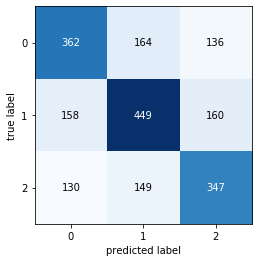

In [36]:
!pip install mlxtend
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
conf=confusion_matrix(actual_alternative,predicted_alternative)
fig, ax = plot_confusion_matrix(conf_mat=conf)
plt.show()

# III. Conjoint Simulator 

In [10]:
model1.summary['parameters']

Price             -0.005089
Brand_Galaxy       0.337886
Brand_Kindle       0.263011
Brand_Surface      0.145036
Brand_iPad         0.978029
Size_sz10inch      0.324063
Size_sz8inch       0.189077
Size_sz9inch       0.435542
Storage_st128gb    0.589770
Storage_st32gb     0.216872
Storage_st64gb     0.578218
Ram_r2gb           0.318935
Ram_r4gb           0.635744
Battery_b8h        0.129960
Battery_b9h        0.125382
Name: parameters, dtype: float64

In [11]:
def count(row):
    loc=row['index'].find('_')
    to_cut=-(len(row['index'])-loc)
    #trim=row['index'].str[-1:to_cut]
    return to_cut
coeff.apply(count,axis=1)

NameError: name 'coeff' is not defined

In [15]:
product=pd.read_csv('Choice_Set.csv')
product

,Brand,Size,Storage,Ram,Battery,Price
0,iPad,sz7inch,st64gb,r2gb,b8h,399
1,Galaxy,sz10inch,st32gb,r2gb,b7h,299
2,Surface,sz10inch,st64gb,r1gb,b7h,399
3,Kindle,sz7inch,st32gb,r1gb,b9h,169


In [16]:
new=pd.DataFrame()
new.loc[1,'Brand']='Nex'
new['Size']='7inc'
new['Storage']='32gb'
new['Ram']='3gb'
product.append(new)

,Battery,Brand,Price,Ram,Size,Storage
0,b8h,iPad,399.0,r2gb,sz7inch,st64gb
1,b7h,Galaxy,299.0,r2gb,sz10inch,st32gb
2,b7h,Surface,399.0,r1gb,sz10inch,st64gb
3,b9h,Kindle,169.0,r1gb,sz7inch,st32gb
1,NaN,Nex,NaN,3gb,7inc,32gb


In [13]:
def predict_share(data,model):
    util_table=data.copy()
    util_table=pd.get_dummies(data)
    for i in util_table.columns:
        if i in model.summary['parameters']:
            util_table[i]=util_table[i].apply(lambda x:x*model.summary['parameters'][i] if x>0 else 0)
        else:    
            util_table[i]=0
    util_table['Exp_Util']=np.exp(util_table.sum(axis=1))
    sum_util=util_table['Exp_Util'].sum(axis=0)
    data['Exp_share']=util_table['Exp_Util']/sum_util
    return data

In [22]:
predicted_table=predict_share(product,model1)
predicted_table

,Brand,Size,Storage,Ram,Battery,Price,Exp_share
0,iPad,sz7inch,st64gb,r2gb,b8h,399,0.342393
1,Galaxy,sz10inch,st32gb,r2gb,b7h,299,0.254030
2,Surface,sz10inch,st64gb,r1gb,b7h,399,0.131385
3,Kindle,sz7inch,st32gb,r1gb,b9h,169,0.272192


([<matplotlib.patches.Wedge at 0x223b0995788>,
 [Text(-0.9678936632135728, 0.5226680176852332, 'iPad'),
  Text(-0.2101380201572132, -1.0797416415441274, 'Galaxy'),
  Text(0.9365134031131517, -0.577011824653034, 'Surface'),
  Text(0.8301112075184056, 0.7217446800305041, 'Kindle')],
 [Text(-0.5279419981164942, 0.28509164601012715, '34.2%'),
  Text(-0.11462073826757083, -0.5889499862967967, '25.4%'),
  Text(0.5108254926071736, -0.3147337225380185, '13.1%'),
  Text(0.4527879313736757, 0.3936789163802749, '27.2%')])

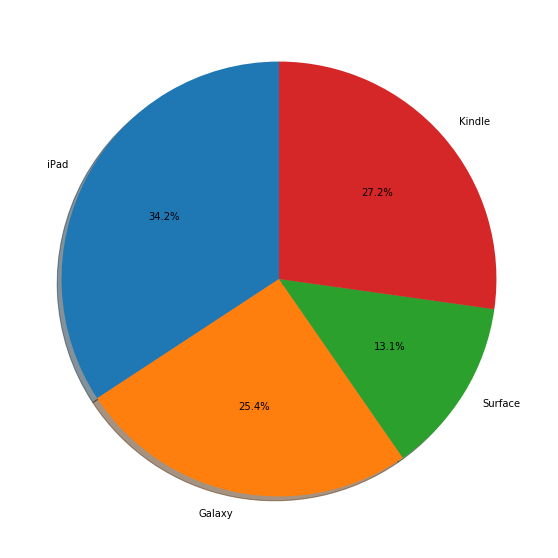

In [23]:
labels=predicted_table['Brand']
sizes=predicted_table['Exp_share']
fig=plt.figure(figsize=(30,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

How will the predicted share change when Galaxy upgrade its RAM to 4gb?

In [55]:
product_new=product.copy()
product_new.loc[1,'Ram']='r4gb'
predict_share(product_new,model1)

,Brand,Size,Storage,Ram,Battery,Price,Exp_share
0,iPad,sz7inch,st64gb,r2gb,b8h,399,0.312777
1,Galaxy,sz10inch,st32gb,r4gb,b7h,299,0.318554
2,Surface,sz10inch,st64gb,r1gb,b7h,399,0.120021
3,Kindle,sz7inch,st32gb,r1gb,b9h,169,0.248648


# IV. Willing to Pay

In [50]:
val_per_util=-1/model1.summary['parameters']['Price']
val_per_util

196.50984652987597

In [59]:
model1.summary['parameters']

Price             -0.005089
Brand_Galaxy       0.337886
Brand_Kindle       0.263011
Brand_Surface      0.145036
Brand_iPad         0.978029
Size_sz10inch      0.324063
Size_sz8inch       0.189077
Size_sz9inch       0.435542
Storage_st128gb    0.589770
Storage_st32gb     0.216872
Storage_st64gb     0.578218
Ram_r2gb           0.318935
Ram_r4gb           0.635744
Battery_b8h        0.129960
Battery_b9h        0.125382
Name: parameters, dtype: float64

How much are people willing to pay more to get an Ipad vs. a Galaxy ?

In [61]:
(model1.summary['parameters']['Brand_iPad']-model1.summary['parameters']['Brand_Galaxy'])*val_per_util

125.79441418344297

How about paying more to get a storage of 128gb vs. 64gb?

In [63]:
(model1.summary['parameters']['Ram_r4gb']-model1.summary['parameters']['Ram_r2gb'])*val_per_util

62.256099325082076

All these prediction would be great sources of information for business to decide which features they should invest in upgrading so that its product could be priced at a higher position.

In [49]:
data['Price']=data['Price'].str[1:]
data['Price']=data['Price'].astype('int')

In [51]:

lm=sf.mnlogit('Choice ~0+ Brand + Size + Storage + Ram + Battery + Price',data=data).fit()
print(lm.summary())


Optimization terminated successfully.
         Current function value: 0.579977
         Iterations 6
                          MNLogit Regression Results                          
Dep. Variable:                 Choice   No. Observations:                 6165
Model:                        MNLogit   Df Residuals:                     6149
Method:                           MLE   Df Model:                           15
Date:                Sat, 09 May 2020   Pseudo R-squ.:                 0.08882
Time:                        18:06:10   Log-Likelihood:                -3575.6
converged:                       True   LL-Null:                       -3924.1
Covariance Type:            nonrobust   LLR p-value:                7.721e-139
         Choice=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Brand[Galaxy]         0.5084      0.132      3.864      0.000       0.251       0.766
Brand[Ki

In [3]:
!pip install choicemodels

In [11]:
t=class choicemodels.MultinomialLogit(data=df,model_expression='Choice ~ 0 + Brand + Size + Storage + Ram + Battery + Price',choice_col=choice,observation_id_col=obs).fit()

SyntaxError: invalid syntax (<ipython-input-11-15cac8ba100b>, line 1)

In [10]:
choice=df['Choice']
obs=df['AlternativeIdInSet']

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6165 entries, 0 to 6164
Data columns (total 10 columns):
ConsumerId            6165 non-null int64
ChoiceSetId           6165 non-null int64
AlternativeIdInSet    6165 non-null int64
Choice                6165 non-null int64
Brand                 6165 non-null object
Size                  6165 non-null object
Storage               6165 non-null object
Ram                   6165 non-null object
Battery               6165 non-null object
Price                 6165 non-null int32
dtypes: int32(1), int64(4), object(5)
memory usage: 457.7+ KB


In [ ]:
https://github.com/timothyb0912/pylogit/blob/master/examples/notebooks/Main%20PyLogit%20Example.ipynb

In [4]:
df=pd.get_dummies(df,columns=['Brand','Size','Storage','Ram','Battery'])

In [5]:
df

,ConsumerId,ChoiceSetId,AlternativeIdInSet,Choice,Price,Brand_Galaxy,Brand_Kindle,Brand_Nexus,Brand_Surface,Brand_iPad,...,Storage_st128gb,Storage_st16gb,Storage_st32gb,Storage_st64gb,Ram_r1gb,Ram_r2gb,Ram_r4gb,Battery_b7h,Battery_b8h,Battery_b9h
0,1,1,1,1,499,0,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
1,1,1,2,0,399,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
2,1,1,3,0,499,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0
3,1,2,1,1,399,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
4,1,2,2,0,299,0,0,0,1,0,...,1,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6160,137,2054,2,1,499,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0
6161,137,2054,3,0,199,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
6162,137,2055,1,0,399,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
6163,137,2055,2,0,399,0,0,0,0,1,...,0,0,0,1,0,1,0,0,1,0


In [15]:
import pylogit as pl
from collections import OrderedDict

In [16]:
choice_spec=OrderedDict()
choice_name=OrderedDict()

In [20]:
df=df.pivot(index='ConsumerId')

KeyError: 'None of [None] are in the columns'

In [8]:
Y=df['Choice']
X=df.iloc[:,4:]
test=sfg

AttributeError: module 'statsmodels.api' has no attribute 'logit'

In [14]:
names=df.iloc[:,4:]